# Pandas的基础操作

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建表格
workout_dict = {
    "calories":[420, 380, 390, 380],
    "duration":[50, 54, 45, 42],
    "type":['run', 'work', 'run', 'walk']
}

workout = pd.DataFrame(workout_dict)
display(workout)

,calories,duration,type
0,420,50,run
1,380,54,work
2,390,45,run
3,380,42,walk


## 访问df的列名/索引

In [2]:
workout.columns

Index(['calories', 'duration', 'type'], dtype='object')

In [3]:
workout.index

RangeIndex(start=0, stop=4, step=1)

In [4]:
workout.columns.tolist()

['calories', 'duration', 'type']

In [5]:
workout.index.tolist()

[0, 1, 2, 3]

In [6]:
workout.index.to_numpy()

array([0, 1, 2, 3], dtype=int64)

## 重命名

In [7]:
workout.index = ["D1", "D2", "D3", "D4"]
display(workout)

,calories,duration,type
D1,420,50,run
D2,380,54,work
D3,390,45,run
D4,380,42,walk


In [8]:
workout.columns = ['Calories', 'Duration', 'Type']
display(workout)

,Calories,Duration,Type
D1,420,50,run
D2,380,54,work
D3,390,45,run
D4,380,42,walk


In [9]:
# 单独改变某一行
workout = workout.rename(columns={'Calories':'Cal'})
display(workout)

,Cal,Duration,Type
D1,420,50,run
D2,380,54,work
D3,390,45,run
D4,380,42,walk


In [10]:
# 切换成字典
workout_dict = workout.to_dict()
display(workout_dict)

{'Cal': {'D1': 420, 'D2': 380, 'D3': 390, 'D4': 380},
 'Duration': {'D1': 50, 'D2': 54, 'D3': 45, 'D4': 42},
 'Type': {'D1': 'run', 'D2': 'work', 'D3': 'run', 'D4': 'walk'}}

In [11]:
# 单独指定行的索引
workout = pd.DataFrame(workout_dict,
                        index=['D4', 'D3', 'D2', 'D1'])
workout

,Cal,Duration,Type
D4,380,42,walk
D3,390,45,run
D2,380,54,work
D1,420,50,run


In [12]:
# 访问表格的列与行
print(workout['Cal'])
print(type(workout['Cal']))

D4    380
D3    390
D2    380
D1    420
Name: Cal, dtype: int64
<class 'pandas.core.series.Series'>


In [13]:
# 选择列但保留表格结构DataFrame结构
workout[['Cal']]

,Cal
D4,380
D3,390
D2,380
D1,420


In [14]:
# 访问列表的行和列--loc：跟据索引选取数据(标签索引)
workout.loc['D1', :]

Cal         420
Duration     50
Type        run
Name: D1, dtype: object

In [15]:
#保留DataFrame
workout.loc[['D1'], :]

,Cal,Duration,Type
D1,420,50,run


In [16]:
# iloc：跟据位置读取数，从零开始编号
workout.iloc[0, :]

Cal          380
Duration      42
Type        walk
Name: D4, dtype: object

In [17]:
workout.iloc[[0], :]

,Cal,Duration,Type
D4,380,42,walk


In [18]:
# 访问多行多列
workout.iloc[0:2, 0:2]

,Cal,Duration
D4,380,42
D3,390,45


In [19]:
workout.iloc[[0, 1], [0, 2]]

,Cal,Type
D4,380,walk
D3,390,run


In [20]:
# .at[] 访问表格的列与行
workout.at['D1', 'Cal']

420

In [21]:
# 还可以进行赋值
workout.at['D1', 'Cal'] = 480
workout.at['D1', 'Cal']

480

# Pandas基础操作2：实际工作常用的命令

本次实验采用Kaggle上经典的泰坦尼克号生还数据集，该数据集包含891位乘客的个人信息数据，数据包含以下字段：
• PassengerId ： 乘客编号。  
• Survived ： 是否存活，0表示未能存活，1表示存活。  
• Pclass ： 描述乘客所属的等级，总共分为三等，用1、2、3来描述：1表示高等；2表示中等；3表示低等。  
• Name ： 乘客姓名。  
• Sex ： 乘客性别。  
• Age ： 乘客年龄。  
• SibSp ： 与乘客同行的兄弟姐妹（Siblings）和配偶（Spouse）数目。  
• Parch ： 与乘客同行的家长（Parents）和孩子（Children）数目。  
• Ticket ： 乘客登船所使用的船票编号。  
• Fare ： 乘客上船的花费。  
• Cabin ： 乘客所住的船舱。  
• Embarked ： 乘客上船时的港口，C表示Cherbourg；Q表示Queenstown；S表示Southampton。  

In [22]:
# 常用参数：index_col--索引行，sep--分隔符，header等
titanic = pd.read_csv('./data/titanic.csv')

In [23]:
print(len(titanic), titanic.shape)

891 (891, 12)


In [24]:
# 查看开头（）行
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# 查看末尾（）行
titanic.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [26]:
# 随机查看（）行
titanic.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S
315,316,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,347470,7.8542,NaN,S
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C


In [27]:
# 描述数分布
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
# 查看列的数据类型
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
titanic.dtypes # object--字符串，dtetime--时间型，category--种类类型（numpy中没有对应类型）

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [30]:
# 访问不重复的所有数据
titanic['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [31]:
titanic[['Age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [32]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [33]:
# DF.groupby()--跟据列的值分类，对每个类型统计信息
titanic[['Sex', 'PassengerId']].groupby(['Sex']).count()

,PassengerId
Sex,
female,314
male,577


In [34]:
# 生还人数-按照舱室等级
survie_by_class = titanic[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 
                'Survived']).count().rename(columns={'PassengerId':'count'})
survie_by_class

count
Pclass Survived       
1      0            80
       1           136
2      0            97
       1            87
3      0           372
       1           119

<Axes: xlabel='Pclass', ylabel='count'>

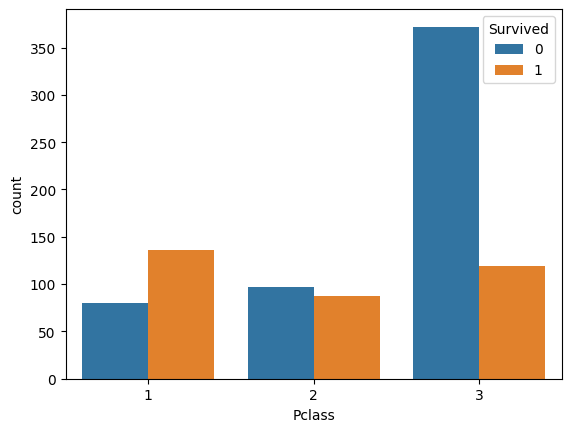

In [35]:
import seaborn as sns
sns.barplot(data=survie_by_class, x='Pclass', 
           y='count', hue='Survived')

In [36]:
# 重新建立索引(返回可以使用--set_index也即互为逆运算)
survie_by_class = survie_by_class.reset_index()
display(survie_by_class)
survie_by_class = survie_by_class.set_index(['Pclass', 'Survived'])
display(survie_by_class)

,Pclass,Survived,count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


count
Pclass Survived       
1      0            80
       1           136
2      0            97
       1            87
3      0           372
       1           119

### flitering

~：按照位置取相反(not)  
&：按照位置相加(and)  
|：按照位置取或(or)


In [37]:
# 删除年龄缺失的行删除
filt = (~titanic['Age'].isnull())
titanic_filt_age = titanic.loc[filt, :]
titanic_filt_age.loc[titanic_filt_age['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [38]:
# .agg()--一次获得多种信息
def percentile_25(x):
    return x.quantile(0.25)

def percentile_75(x):
    return x.quantile(0.75)

age_agg = (
    titanic_filt_age
    .groupby(['Pclass', 'Survived'])['Age']
    .agg(
        min_age='min',
        max_age='max',
        mean_age='mean',
        median_age='median',
        count='size',
        std_age=np.std,
        q25=percentile_25,
        q75=percentile_75
    )
    # .reset_index()
)
age_agg

min_age  max_age   mean_age  median_age  count    std_age  \
Pclass Survived                                                              
1      0            2.00     71.0  43.695312       45.25     64  15.284243   
       1            0.92     80.0  35.368197       35.00    122  13.760017   
2      0           16.00     70.0  33.544444       30.50     90  12.151581   
       1            0.67     62.0  25.901566       28.00     83  14.837787   
3      0            1.00     74.0  26.555556       25.00    270  12.334882   
       1            0.42     63.0  20.646118       22.00     85  11.995047   

                   q25    q75  
Pclass Survived                
1      0         31.00  55.25  
       1         24.25  45.00  
2      0         25.00  39.00  
       1         17.50  34.00  
3      0         19.00  33.00  
       1         14.00  29.00

In [39]:
# help(titanic.agg)

In [40]:
print(age_agg.columns, '\n',age_agg.index)

Index(['min_age', 'max_age', 'mean_age', 'median_age', 'count', 'std_age',
       'q25', 'q75'],
      dtype='object') 
 MultiIndex([(1, 0),
            (1, 1),
            (2, 0),
            (2, 1),
            (3, 0),
            (3, 1)],
           names=['Pclass', 'Survived'])


In [41]:
age_med = age_agg.loc[:, 'max_age']
age_med

Pclass  Survived
1       0           71.0
        1           80.0
2       0           70.0
        1           62.0
3       0           74.0
        1           63.0
Name: max_age, dtype: float64

In [42]:
# Series的三大属性：name，values,iIndex
print(age_med.name, '\n', age_med.values, '\n', age_med.index)

max_age 
 [71. 80. 70. 62. 74. 63.] 
 MultiIndex([(1, 0),
            (1, 1),
            (2, 0),
            (2, 1),
            (3, 0),
            (3, 1)],
           names=['Pclass', 'Survived'])


In [43]:
one_row = titanic.iloc[10, :]
print(one_row.name, '\n', one_row.values, '\n', one_row.index)
# 这里说明DataFrame序列是在横向或者纵向凭借构成的

10 
 [11 1 3 'Sandstrom, Miss. Marguerite Rut' 'female' 4.0 1 1 'PP 9549' 16.7
 'G6' 'S'] 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# 工作流